In [1]:
import pandas as pd 
import xml.etree.ElementTree as et 

xtree = et.parse("Test_data_survival_course.xml")
xroot = xtree.getroot() 



In [91]:

for node in xroot: 
    print(node.find('Worksheet'))
    
    for n in node:
        print(n)

None
<Element '{urn:schemas-microsoft-com:office:office}LastAuthor' at 0x000001DDD84B9C78>
<Element '{urn:schemas-microsoft-com:office:office}Created' at 0x000001DDD84DB7C8>
<Element '{urn:schemas-microsoft-com:office:office}LastSaved' at 0x000001DDD84DBE08>
<Element '{urn:schemas-microsoft-com:office:office}Version' at 0x000001DDD84DBEA8>
None
<Element '{urn:schemas-microsoft-com:office:office}AllowPNG' at 0x000001DDD84DBF48>
None
<Element '{urn:schemas-microsoft-com:office:excel}WindowHeight' at 0x000001DDD84EC048>
<Element '{urn:schemas-microsoft-com:office:excel}WindowWidth' at 0x000001DDD84EC098>
<Element '{urn:schemas-microsoft-com:office:excel}WindowTopX' at 0x000001DDD84EC0E8>
<Element '{urn:schemas-microsoft-com:office:excel}WindowTopY' at 0x000001DDD84EC138>
<Element '{urn:schemas-microsoft-com:office:excel}ProtectStructure' at 0x000001DDD84EC188>
<Element '{urn:schemas-microsoft-com:office:excel}ProtectWindows' at 0x000001DDD84EC1D8>
None
<Element '{urn:schemas-microsoft-com

In [67]:
import pandas_read_xml as pdx

In [82]:
pdx.read_xml("Test_data_survival_course.xml", ['Workbook', 'Worksheet']).Table.Column

OrderedDict([('@ss:AutoFitWidth', '0'),
             ('@ss:Width', '150'),
             ('@ss:Span', '1')])

In [7]:
df = pd.read_excel("Test_data_survival_course.xlsx")

In [13]:
import numpy as np

In [24]:
MAGIC = 'Cycle(Seconds)/Well'

In [30]:
save = {}

for column_id, (column_name, column) in enumerate(df.items()):
    print(column_name, ":::::")
    
    for row_id, element in enumerate(column):
#         print(element)
        
        if element == MAGIC:
            print("FOUND!!!")
            save['column_name'] = column_name
            save['column_id'] = column_id
            save['row_id'] = row_id 
            break
        
    if len(save):
        break
        
save

User :::::
Test :::::
Unnamed: 2 :::::
FOUND!!!


{'column_id': 2, 'column_name': 'Unnamed: 2', 'row_id': 65}

In [33]:
DATA = df.iloc[save['row_id']:, save['column_id']:].values

In [34]:
DATA.shape

(866, 97)

In [37]:
df_pretty = pd.DataFrame(DATA[1:], columns=DATA[0, :])

In [45]:
df_pretty = df_pretty.replace("#SAT", np.nan)

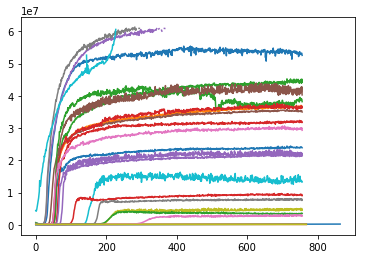

In [50]:
df_pretty.plot(legend=False)

In [48]:
df_pretty.set_index(MAGIC)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
Cycle(Seconds)/Well,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
258300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
258600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
plate_view = pd.read_excel("Plate_view.xlsx", header=1, index_col=0)

In [112]:
plate_view

,1,2,3,4,5,6,7,8,9,10,11,12
A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C,NaN,NaN,NaN,1.0,2.0,3.0,4.0,6.0,5.0,NaN,NaN,NaN
D,NaN,NaN,NaN,7.0,8.0,1.0,2.0,3.0,4.0,NaN,NaN,NaN
E,NaN,NaN,NaN,6.0,5.0,7.0,8.0,1.0,2.0,NaN,NaN,NaN
F,NaN,NaN,NaN,3.0,4.0,5.0,7.0,8.0,10.0,NaN,NaN,NaN
G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
unique_ids = np.unique(plate_view)
unique_ids = unique_ids[~np.isnan(unique_ids)]
unique_ids

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8., 10.])

In [130]:
d = {}

for uid in unique_ids:
    d[uid] = []
    
    for column_name, column in plate_view.items():
        for row_name, row in column.items():
            if row == uid:
#                 print(uid, f"{row_name}{column_name}")
                d[uid].append(f"{row_name}{column_name}")
    
d

{1.0: ['C4', 'D6', 'E8'],
 2.0: ['C5', 'D7', 'E9'],
 3.0: ['F4', 'C6', 'D8'],
 4.0: ['F5', 'C7', 'D9'],
 5.0: ['E5', 'F6', 'C9'],
 6.0: ['E4', 'C8'],
 7.0: ['D4', 'E6', 'F7'],
 8.0: ['D5', 'E7', 'F8'],
 10.0: ['F9']}

In [132]:
import matplotlib.pyplot as plt
%matplotlib inline

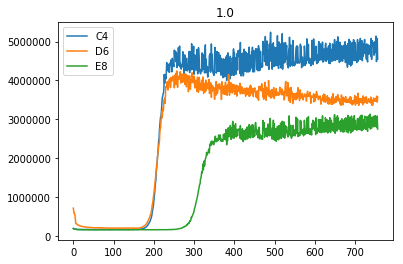

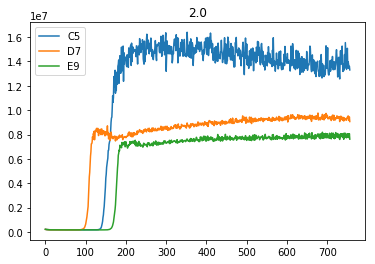

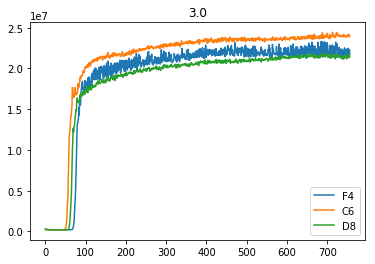

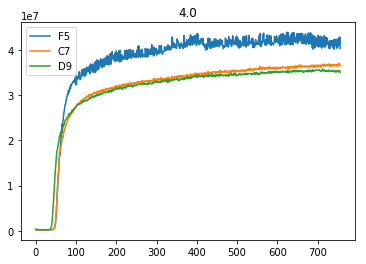

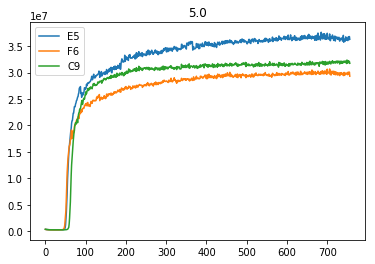

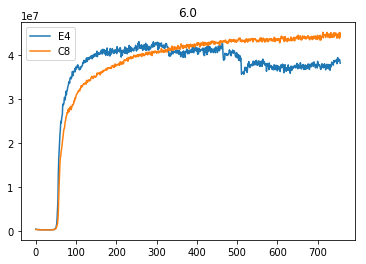

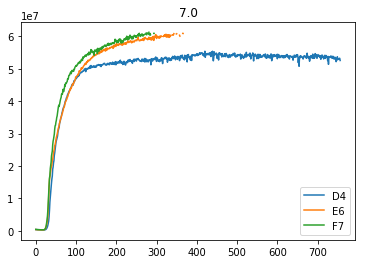

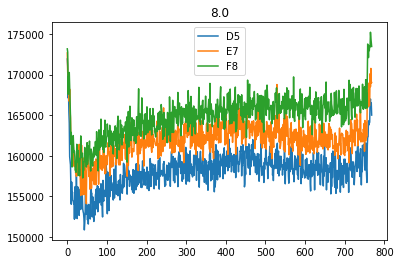

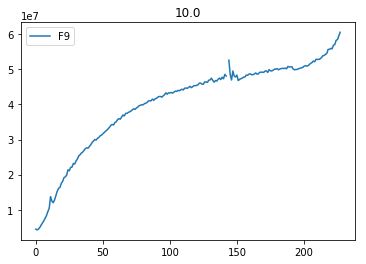

In [134]:
for uid, columns in d.items():
    df_pretty[columns].plot()
    plt.title(uid)

In [141]:
to_df = {}

for uid, columns in d.items():
    to_df[uid] = df_pretty[columns].mean(1)
    
df_pretty_mean = pd.DataFrame(to_df)
df_pretty_mean

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,10.0
0,371336.666667,215742.000000,263484.666667,300999.333333,335172.666667,390207.5,431550.666667,172579.333333,4460955.0
1,340485.333333,209323.666667,252784.000000,286322.333333,318900.333333,371262.5,415864.666667,171378.000000,4230298.0
2,318011.000000,201151.000000,240430.333333,275462.333333,304493.000000,347466.0,395660.333333,168133.333333,4466618.0
3,318283.333333,197424.000000,235010.666667,264451.000000,294719.666667,337293.5,385173.666667,168975.000000,4956637.0
4,302839.666667,195979.000000,227121.000000,258872.666667,283509.333333,324697.5,373134.333333,167781.000000,5618468.0
...,...,...,...,...,...,...,...,...,...
860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


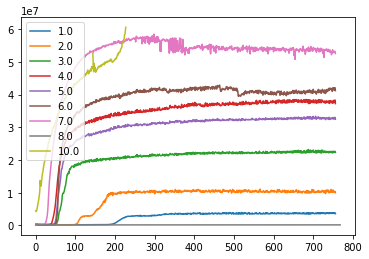

In [142]:
df_pretty_mean.plot()